<a href="https://colab.research.google.com/github/rss-design/data_science/blob/master/Estudo_de_Caso_01_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100" src="https://img.shields.io/badge/author-rss--design-red">

#### **Data Science**
*Por Rafael Santos*

---

# Análise dos Dados do Airbnb - *Seattle, Washington, United States*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Seatle, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/wa/seattle/2020-05-21/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61082,-122.29082,Entire home/apt,296,1,32,2020-02-01,0.22,2,132
1,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65411,-122.33761,Entire home/apt,90,30,150,2019-09-28,1.14,3,89
2,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,62,2,148,2019-12-27,1.24,7,364
3,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55539,-122.38474,Entire home/apt,165,3,40,2019-12-30,0.39,2,293
4,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55624,-122.38598,Entire home/apt,125,2,50,2020-05-17,0.49,2,323


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame.
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}".format(df.shape[1]))
print("\t")

# Listar os tipos das variáveis.
display(df.dtypes)

Entradas:	7017
Variáveis:	16
	


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.134103
last_review                       0.134103
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

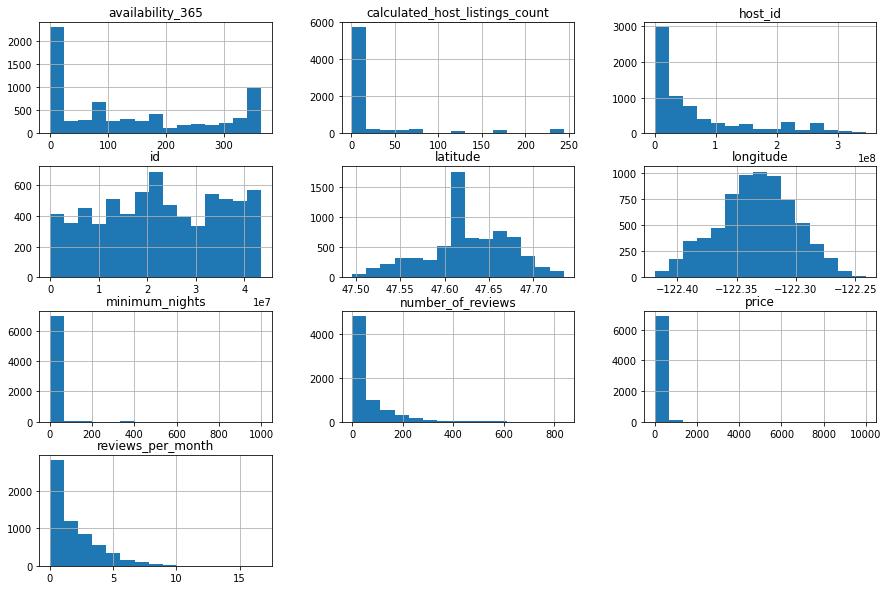

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Pela distribuição do histograma, é possível verificar indícios da presença de outliers, citando como exemplo:
  * Variáveis que não apresentam uma distribuição, distorcendo a representação gráfica: 
    *  `price`
    *  `minimum_nights`
    *  `calculated_host_listings_count`

### **Q4. Qual a média dos preços de aluguel?**

Através do **resumo estatístico**, podemos analisar em números estas distorções.

In [ ]:
# ver a média da coluna `price``
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7017.000000,7017.000000,7017.000000,6076.000000,7017.000000,7017.000000
mean,159.711843,13.062420,55.267066,1.925614,21.722816,138.720251
std,279.551528,22.937979,81.870026,1.904479,52.846551,133.549276
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,79.000000,2.000000,3.000000,0.410000,1.000000,0.000000
50%,113.000000,3.000000,21.000000,1.300000,2.000000,93.000000
75%,180.000000,30.000000,75.000000,2.900000,7.000000,263.000000
max,10000.000000,1000.000000,837.000000,16.720000,244.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 180, porém seu valor máximo é 10000.
* A quantidade de mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Gráfico **Boxplot** é uma excelente opção, para analisar onde estão distribuídos os **outliers** das noites mínimas permitidas ('minimum_nights').


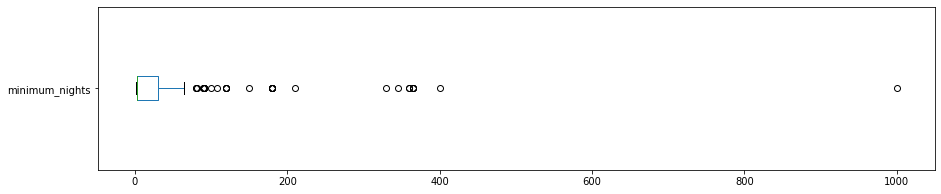

minimum_nights: valores acima de 30:
88 entradas
1.25%


In [7]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.2f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Boxplot para Preço (`price`)

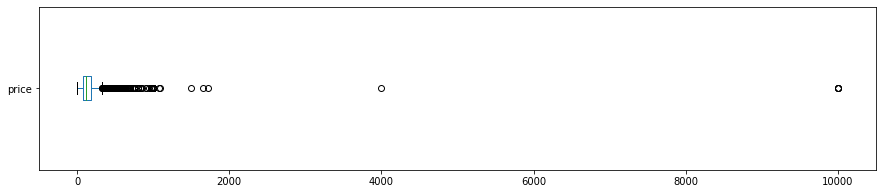


price: valores acima de 1300
8 entradas
0.1140%


In [14]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1300 para price
print("\nprice: valores acima de 1300")
print("{} entradas".format(len(df[df.price > 1300])))
print("{:.4f}%".format((len(df[df.price > 1300]) / df.shape[0])*100))

### Histograma sem *Outliers*

Já que identificamos outliers nas variáveis `price` e `minimum_nights`, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

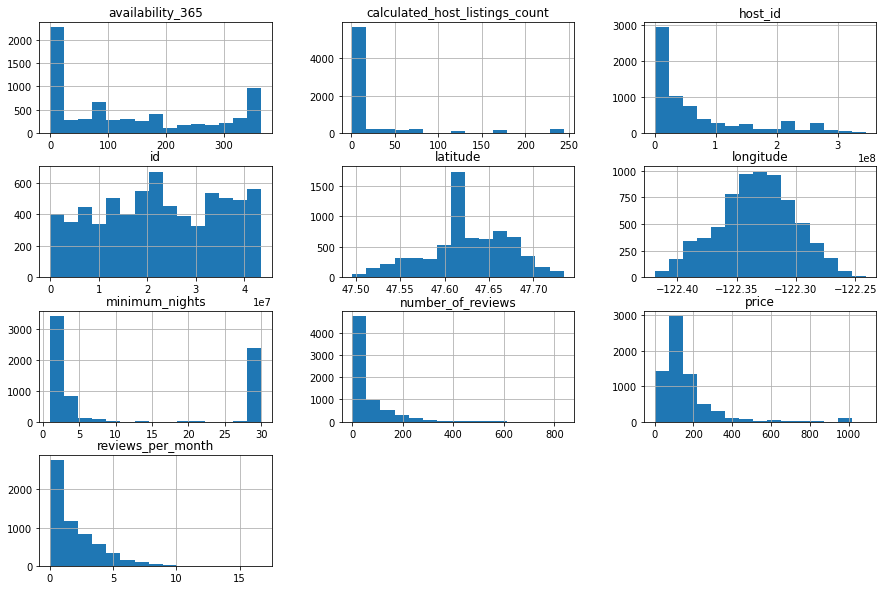

In [13]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Através da *Matriz de correlação*, podemos analisar relação ou semelhança entre duas variáveis.

In [17]:
# criar uma matriz de correlação
df_correlacao = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(df_correlacao)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.072434,-0.124353,-0.150580,0.101096,0.157160
minimum_nights,-0.072434,1.000000,-0.260754,-0.386861,0.009030,-0.156143
number_of_reviews,-0.124353,-0.260754,1.000000,0.765096,-0.210128,0.113691
reviews_per_month,-0.150580,-0.386861,0.765096,1.000000,-0.164812,0.041121
calculated_host_listings_count,0.101096,0.009030,-0.210128,-0.164812,1.000000,-0.075153
availability_365,0.157160,-0.156143,0.113691,0.041121,-0.075153,1.000000


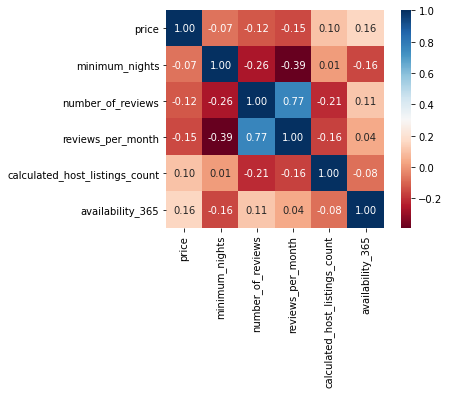

In [18]:
# plotar um heatmap a partir das correlações
sns.heatmap(df_correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Nesta matriz, utilizamos o método de ` Correlação de Pearson`, onde *variáveis com valores de correlação maiores do que 0.7 são, frequentemente, considerados altamente correlacionados.*

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    5306
Private room       1456
Shared room         120
Hotel room           40
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.766541
Private room       0.210344
Shared room        0.017336
Hotel room         0.005779
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [24]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
International District       501.858586
Central Business District    313.971545
West Queen Anne              243.696429
Pioneer Square               229.230769
Briarcliff                   229.000000
Pike-Market                  224.565891
Industrial District          216.666667
North Beach/Blue Ridge       201.250000
Sunset Hill                  195.543478
Madrona                      193.339623
Name: price, dtype: float64

#### Visualizar 10 primeiros registros referene ao bairro ao bairro apresentado como mais caro.


In [47]:
# ver quantidade de imóveis no International District.
print(df_clean[df_clean.neighbourhood == "International District"].shape)

# listar as 10 primeiras entradas das 99 localizadas para a bairro International District.
df_clean[df_clean.neighbourhood == "International District"].head(10)

(99, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
79,365550,art loft downtown~ID~Stadiums,1025723,Dirk & Jaq,International District,47.60002,-122.32742,Private room,99,3,743,2020-03-11,7.48,2,101
689,5031285,Shared Space Main Temple Hondo,25971312,Kanjin,International District,47.59925,-122.32824,Shared room,55,30,327,2019-10-26,5.32,4,365
690,5031383,Shared Space Main Temple Hondo 2nd,25971312,Kanjin,International District,47.59931,-122.32832,Shared room,55,30,232,2020-03-28,3.97,4,365
1247,9012948,Cozy apartment in Downtown,3954802,Omar,International District,47.60117,-122.32700,Entire home/apt,130,30,2,2016-05-04,0.04,1,0
1319,9449062,Unique 1 bedroom apartment,48964209,Kara,International District,47.59918,-122.32466,Entire home/apt,79,30,1,2015-12-19,0.02,1,0
1403,10140582,Private Cozy Place in Chinatown,17902178,Charles,International District,47.59898,-122.32473,Entire home/apt,65,30,2,2016-01-18,0.04,1,0
1695,12682209,Downtown Seattle Near Everything!,52553028,Ada,International District,47.59719,-122.32426,Private room,180,30,30,2016-10-03,0.62,1,0
1837,13318575,Shared Space Main Temple Hondo 3rd,25971312,Kanjin,International District,47.59958,-122.32754,Shared room,55,30,151,2019-09-04,3.19,4,365
1923,13710525,Spacious 1-bedroom apartment in the ID,33119827,Maria,International District,47.59776,-122.32271,Entire home/apt,130,30,3,2016-07-04,0.06,1,0
2073,14555211,Shared Space Main Temple Hondo 4th,25971312,Kanjin,International District,47.60019,-122.32833,Shared room,40,30,235,2019-10-26,5.15,4,365


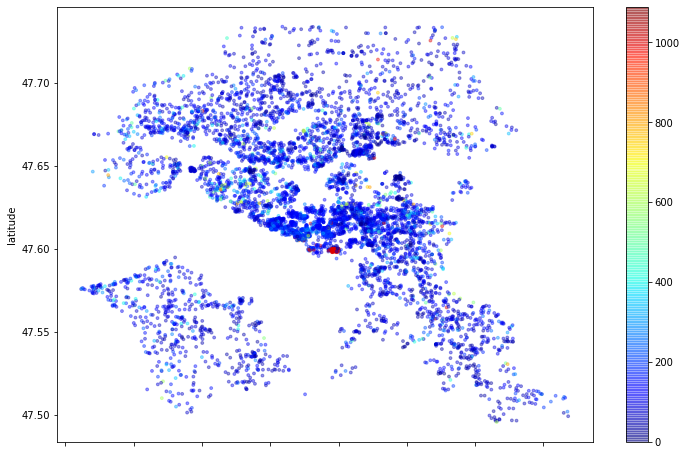

In [25]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [56]:
# ver a média da coluna `minimum_nights`
mean_minimum_nights = df_clean[df_clean.neighbourhood == "International District"].minimum_nights.mean()
print("Média do mínimo de noites para aluguel no bairro International District é {}".format(round(mean_minimum_nights,2)))


Média do mínimo de noites para aluguel no bairro International District é 5.05


## Conclusões


Para este primeiro estudo de caso, foi realizado uma **análise exploratória supercial**, dos dados simplificados disponibilizdos pela empresa Airbnb.

Através de conceitos básicos do Data Science, foi possível notar a existência de alguns outliers nas variáveis `price` e `minimum_nights`, assim como uma enorme quantidade de imóveis indisponíveis para locação, o que acaba gerando bastante distorção nas análises estatísticas.

Para se obter amostras com resultados mais representativos, é necessário apronfundar-se ainda mais na abertura e exploração dos dados, gerando sempre bons questionamentos. Fato este que será melhor abordado nos próximos estudos de casos.

